In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Xử lý dữ liệu đầu vào

In [12]:
df = pd.read_csv("housing_data.csv")
df.isnull().sum()
df.head()

,Size,Age,Price
0,152,7,513.572460
1,398,34,1224.324769
2,320,34,981.373408
3,156,32,416.370691
4,121,4,418.617384


# Tính hệ số tương quan

In [13]:
df.corr()

,Size,Age,Price
Size,1.000000,-0.014299,0.987205
Age,-0.014299,1.000000,-0.118113
Price,0.987205,-0.118113,1.000000


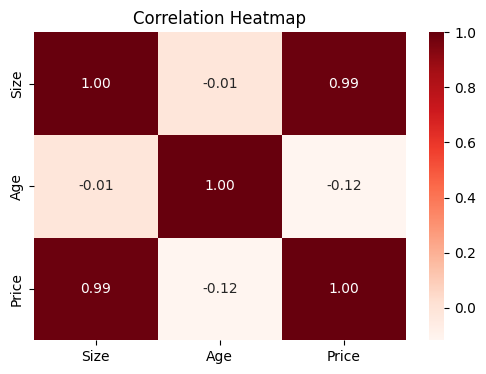

In [14]:
# Vẽ heattmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Train và test mô hình hồi quy tuyến tính đa biến

In [15]:
# Tạo mô hình
model = LinearRegression()


X= df[["Age", "Size"]]
y = df.drop(columns=["Price"])


In [16]:
# Chia tập train; test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=38)

In [17]:
# Train mô hình
model.fit(X_test, y_test)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Dự đoán
y_pred = model.predict(X_test)

In [19]:
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * TV")

Hệ số hồi quy (slope): [-1.39941625e-15  1.00000000e+00]
Hệ số chặn (intercept): [1.13686838e-13 3.55271368e-15]


TypeError: unsupported format string passed to numpy.ndarray.__format__

## Tính chỉ số MSE + R^2 (đánh giá mô hình)

In [127]:
# Đánh gia mô hình (mse, sai số R^2) qua tập test
mse = mean_squared_error(y_true = y_test,y_pred= y_pred)
r2 = model.score(X_test, y_test)
r2_sklearn = r2_score(y_true = y_test, y_pred = y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 (from model.score): {r2:.4f}")
print(f"R2 (from r2_score): {r2_sklearn:.4f}")

##### Nhận xét:
print("========> R^2 nằm càng gần 1 thì càng thể hiện độ chính xác  --> Mô hình hồi quy tuyến tính đạt R^2 = 0.9871, cho thấy mô hình giải thích được 98.71 phần trăm biến thiên của dữ liệu. Điều này đồng nghĩa mô hình có mức độ phù hợp rất cao và dự đoán đáng tin cậy.")

Mean Squared Error: 1119.5329
R^2 (from model.score): 0.9911
R2 (from r2_score): 0.9911
========> R^2 nằm càng gần 1 thì càng thể hiện độ chính xác  --> Mô hình hồi quy tuyến tính đạt R^2 = 0.9871, cho thấy mô hình giải thích được 98.71 phần trăm biến thiên của dữ liệu. Điều này đồng nghĩa mô hình có mức độ phù hợp rất cao và dự đoán đáng tin cậy.


## Vẽ biểu đồ

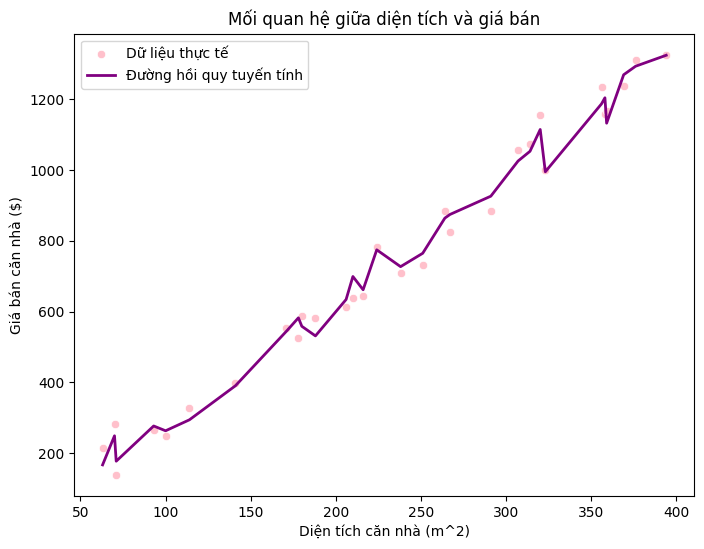

In [128]:
# Tạo DataFrame chứa giá trị thực tế và dự đoán
df_test = pd.DataFrame({
    'Size': X_test['Size'],
    'Gia thực thế': y_test,
    'Gia_du_doan': y_pred
})

# Sắp xếp theo giá trị Size để đường hồi quy mượt
df_test = df_test.sort_values(by='Size')

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Size', y='Gia thực thế',
    data=df_test, color='pink', label='Dữ liệu thực tế'
)
plt.plot(
    df_test['Size'], df_test['Gia_du_doan'],
    color='purple', linewidth=2, label='Đường hồi quy tuyến tính'
)
plt.title('Mối quan hệ giữa diện tích và giá bán')
plt.xlabel('Diện tích căn nhà (m^2)')
plt.ylabel('Giá bán căn nhà ($)')
plt.legend()
plt.show()

### Kết luận:
- Các điểm scatter xếp thành 1 xu hướng tăng rất rõ: Diện tích tăng thì giá cũng tăng

- Đường hồi quy leo đều và mượt, gần sát với các điểm thực tế.

- Mức phân tán (variance) thấp so với Age ===> Size giải thích sự thay đổi của Price rất tốt.

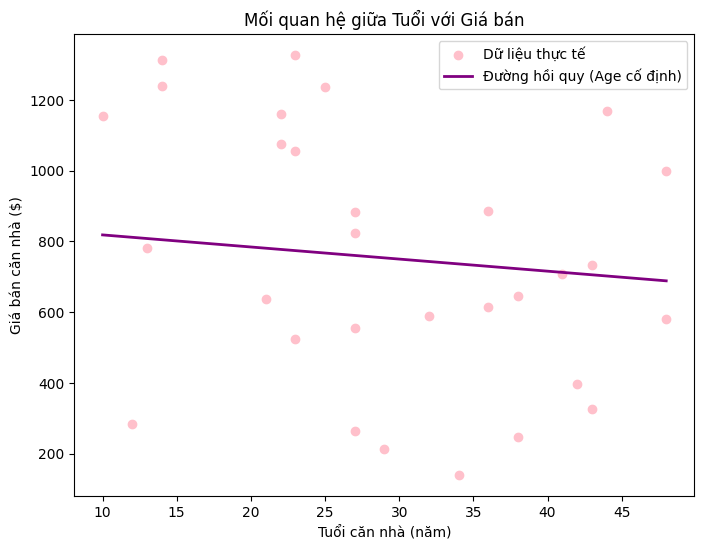

: 

In [130]:
# Tạo bản sao dữ liệu test
df_test_2 = X_test.copy()

# Giữ biến "Size" cố định ở giá trị trung bình trong tập test
df_test_2["Size"] = X_test["Size"].mean()

# Dự đoán giá dựa trên Age (Size đã cố định)
y_line = model.predict(df_test_2)

# Sắp xếp theo Age để vẽ đường mượt
order = np.argsort(X_test["Age"])

# Vẽ biểu đồ
plt.figure(figsize=(8,6))

# Scatter thực tế
plt.scatter(X_test["Age"], y_test, color="pink", label="Dữ liệu thực tế")

# Đường hồi quy tuyến tính (Age thay đổi, Size cố định)
plt.plot(
    X_test["Age"].iloc[order], 
    y_line[order],
    color="purple", linewidth=2, 
    label="Đường hồi quy (Age cố định)"
)

plt.title("Mối quan hệ giữa Tuổi với Giá bán")
plt.xlabel("Tuổi căn nhà (năm)")
plt.ylabel("Giá bán căn nhà ($)")
plt.legend()
plt.show()




### Kết luận
- Các điểm rải rất rộng, không tạo thành đường xu hướng rõ ràng.

- Đường hồi quy có độ dốc âm nhẹ: Tuổi tỉ lệ nghịch với giá nhà => giá càng thấp thì dành cho người lớn tuổi và người có độ tuổi khoảng 20-30 thì mua nhà giá cao

- Các điểm thực tế nằm rất xa đường -> tương quan yếu.

==> Age có ảnh hưởng nhưng không mạnh bằng Size.